In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('EMDAT_1900-2021_NatDis.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15827 entries, 0 to 15826
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           15827 non-null  object 
 1   Year                             15827 non-null  int64  
 2   Seq                              15827 non-null  int64  
 3   Disaster Group                   15827 non-null  object 
 4   Disaster Subgroup                15827 non-null  object 
 5   Disaster Type                    15827 non-null  object 
 6   Disaster Subtype                 12843 non-null  object 
 7   Disaster Subsubtype              1045 non-null   object 
 8   Event Name                       3803 non-null   object 
 9   Entry Criteria                   15492 non-null  object 
 10  Country                          15827 non-null  object 
 11  ISO                              15827 non-null  object 
 12  Region            

In [4]:
# Display summary statistics
print(df.describe())

               Year           Seq  Aid Contribution  Dis Mag Value  \
count  15827.000000  15827.000000      6.770000e+02   4.901000e+03   
mean    1996.319454    714.614393      1.254136e+05   4.773119e+04   
std       20.063829   1930.576206      2.997875e+06   3.108073e+05   
min     1900.000000      1.000000      1.000000e+00  -5.700000e+01   
25%     1988.000000     92.000000      1.750000e+02   7.000000e+00   
50%     2001.000000    268.000000      7.210000e+02   1.550000e+02   
75%     2010.000000    486.000000      3.511000e+03   1.160000e+04   
max     2021.000000   9881.000000      7.800000e+07   1.302587e+07   

         Start Year   Start Month     Start Day      End Year     End Month  \
count  15827.000000  15443.000000  12227.000000  15827.000000  15119.000000   
mean    1996.333165      6.466101     15.245359   1996.390725      6.594153   
std       20.060549      3.406864      8.956736     20.047996      3.365484   
min     1900.000000      1.000000      1.000000   190

In [5]:
# Check for null values
print(df.isnull().sum())

Dis No                                 0
Year                                   0
Seq                                    0
Disaster Group                         0
Disaster Subgroup                      0
Disaster Type                          0
Disaster Subtype                    2984
Disaster Subsubtype                14782
Event Name                         12024
Entry Criteria                       335
Country                                0
ISO                                    0
Region                                 0
Continent                              0
Location                            1808
Origin                             12190
Associated Dis                     12614
Associated Dis2                    15145
OFDA Response                      14220
Appeal                             13259
Declaration                        12612
Aid Contribution                   15150
Dis Mag Value                      10926
Dis Mag Scale                       1171
Latitude        

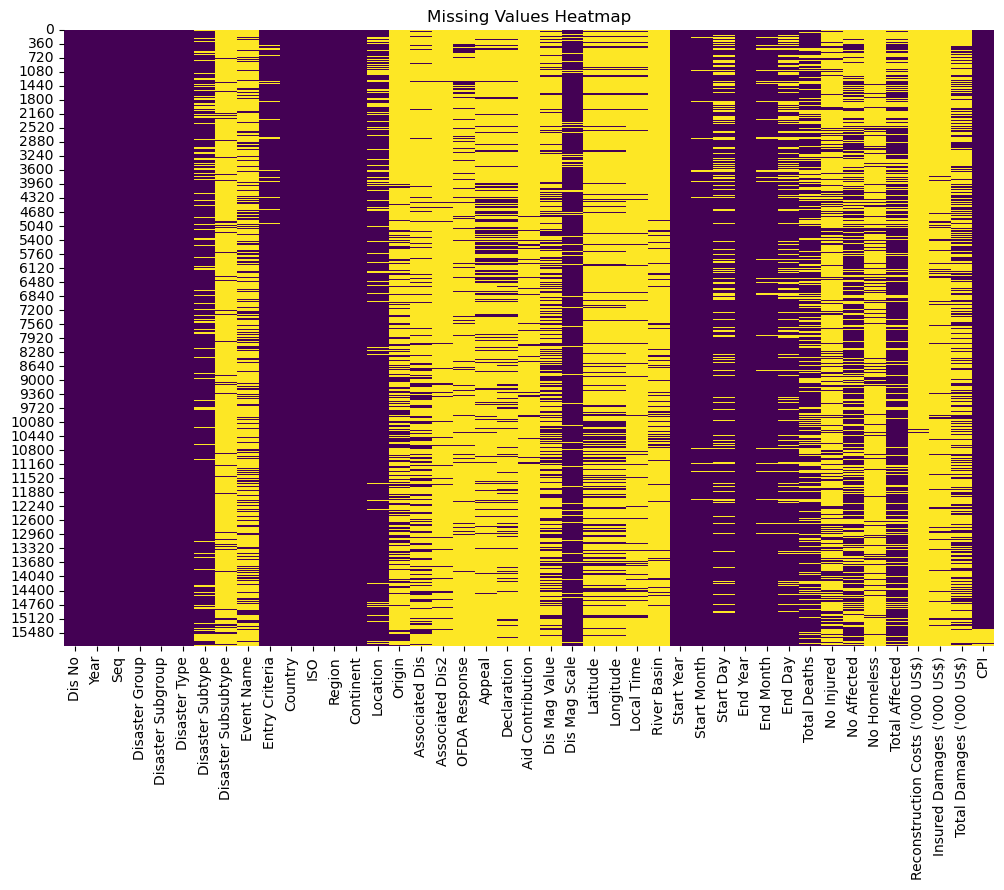

In [6]:
import seaborn as sns

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [7]:
# Fill missing values for numeric columns with the mean
df.fillna(df.mean(), inplace=True)

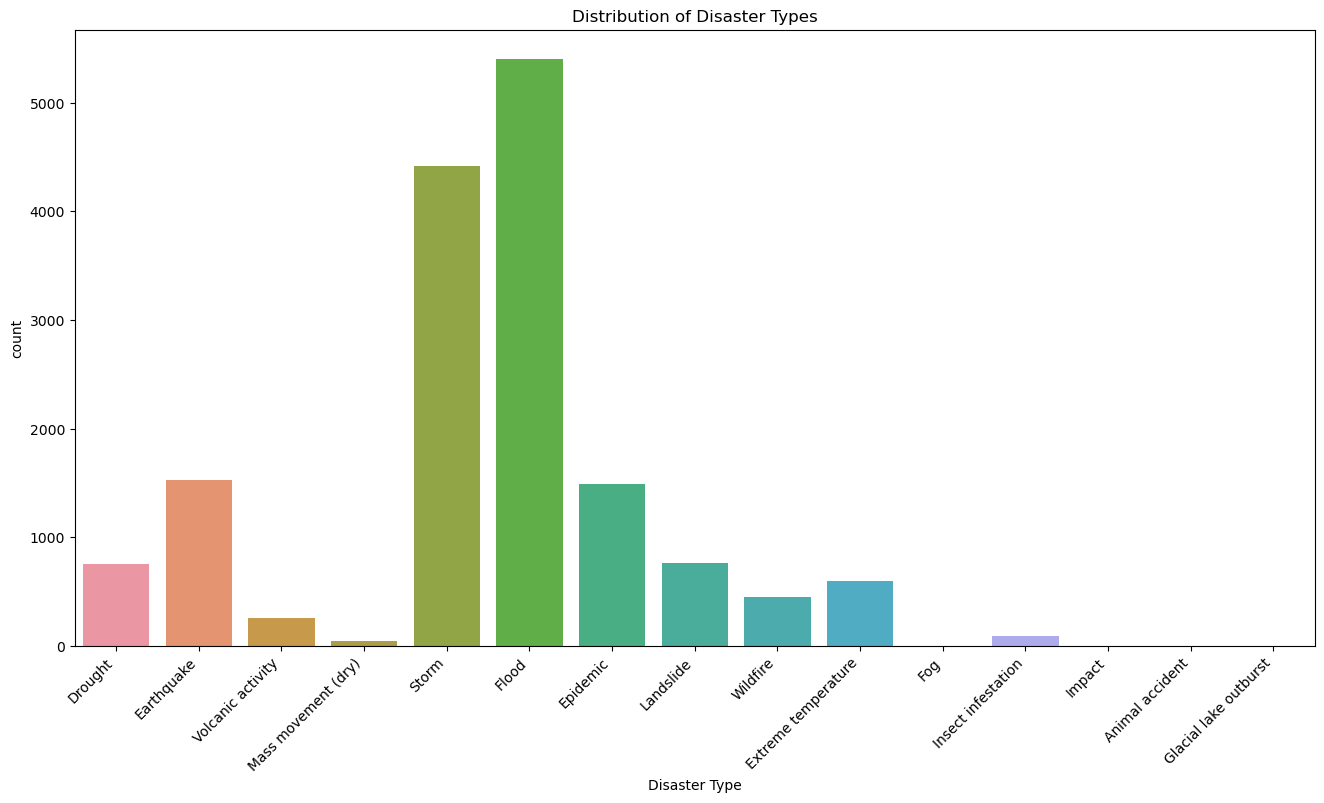

In [8]:
# Categorical Data Visualization
plt.figure(figsize=(16, 8))
sns.countplot(x='Disaster Type', data=df)
plt.title('Distribution of Disaster Types')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [10]:
# Handle categorical data by encoding
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

# Drop irrelevant columns (like identifiers or names) for simplicity
X = df.drop(['Dis No', 'Total Deaths'], axis=1)
y = df['Total Deaths']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature importance analysis (if needed)
feature_importance = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print('\nFeature Importance:')
print(feature_importance_df)

Mean Squared Error: 446100067.5792591

Feature Importance:
                            Feature  Importance
39         Total Damages ('000 US$)    0.180317
15                   Associated Dis    0.104956
7                        Event Name    0.081718
12                        Continent    0.075726
30                         End Year    0.075030
3                 Disaster Subgroup    0.064472
1                               Seq    0.061789
27                       Start Year    0.056263
0                              Year    0.055668
5                  Disaster Subtype    0.046817
11                           Region    0.039164
40                              CPI    0.035601
9                           Country    0.016670
13                         Location    0.015507
8                    Entry Criteria    0.013729
10                              ISO    0.012304
36                   Total Affected    0.010947
4                     Disaster Type    0.009779
32                          E

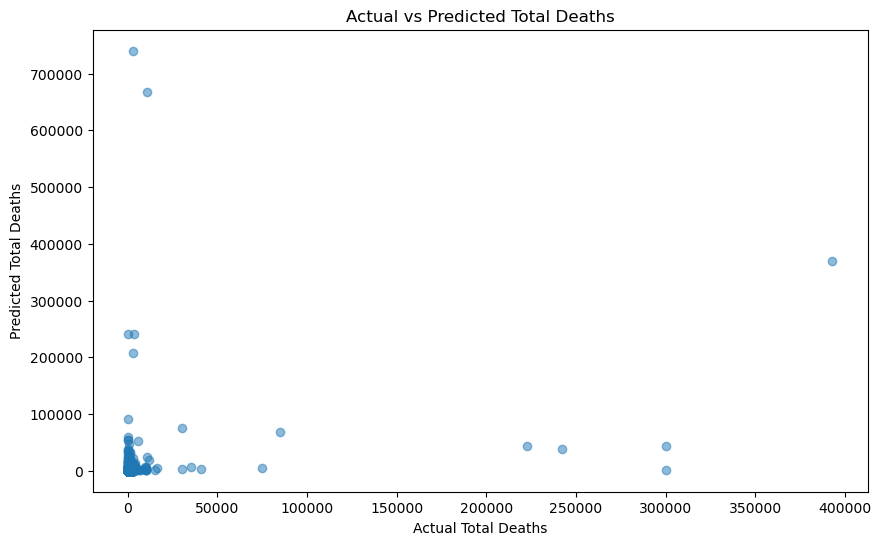

In [11]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Total Deaths')
plt.ylabel('Predicted Total Deaths')
plt.title('Actual vs Predicted Total Deaths')
plt.show()

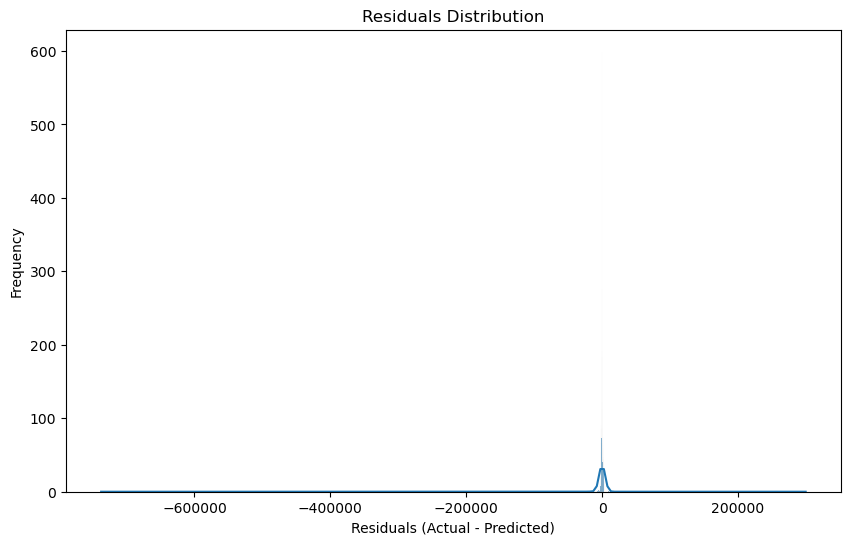

In [12]:
# Residual plot (difference between actual and predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

In [13]:
from scipy.stats import pareto

In [15]:
# Filter out geophysical events
geophysical_df = df[df['Disaster Group'] == 'Natural'][df['Disaster Subgroup'] == 'Geophysical']

# Extract 'Dis Mag Value' for geophysical events
dis_mag_values = geophysical_df['Dis Mag Value'].dropna()

# Check if there's enough variability in the data
if len(set(dis_mag_values)) > 1:
    # Fit the Pareto distribution to the data
    shape, loc, scale = pareto.fit(dis_mag_values)

    # Generate values for the probability density function (PDF)
    x = np.linspace(dis_mag_values.min(), dis_mag_values.max(), 100)
    pdf = pareto.pdf(x, shape, loc, scale)

    # Visualize the Pareto distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(dis_mag_values, bins=20, kde=True, stat='density', color='blue', label='Histogram')
    plt.plot(x, pdf, 'r-', lw=2, label='Pareto Fit')
    plt.title('Pareto Distribution Fit for Geophysical Events Magnitude')
    plt.xlabel('Disaster Magnitude (Dis Mag Value)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
else:
    print("Not enough variability in the data to fit the Pareto distribution.")

Not enough variability in the data to fit the Pareto distribution.


C:\Users\Prokarsha\AppData\Local\Temp\ipykernel_32736\2741932472.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  geophysical_df = df[df['Disaster Group'] == 'Natural'][df['Disaster Subgroup'] == 'Geophysical']


In [16]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [17]:
# Drop columns that might not be relevant for the prediction
df = df.drop(['Dis No', 'Event Name', 'Entry Criteria', 'Country', 'ISO', 'Region', 'Continent', 'Location', 'Origin',
              'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution',
              'CPI'], axis=1)

# Handle categorical data by one-hot encoding
df = pd.get_dummies(df, columns=['Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype'])

# Fill missing values (this can be further improved based on the nature of your data)
df.fillna(df.mean(), inplace=True)

# Split the data into features (X) and target variable (y)
X = df.drop('Total Deaths', axis=1)
y = df['Total Deaths']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Support Vector Regressor (SVR) model
model = SVR(kernel='linear')  # You can explore other kernels like 'rbf', 'poly', etc.

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 146495134.00328767


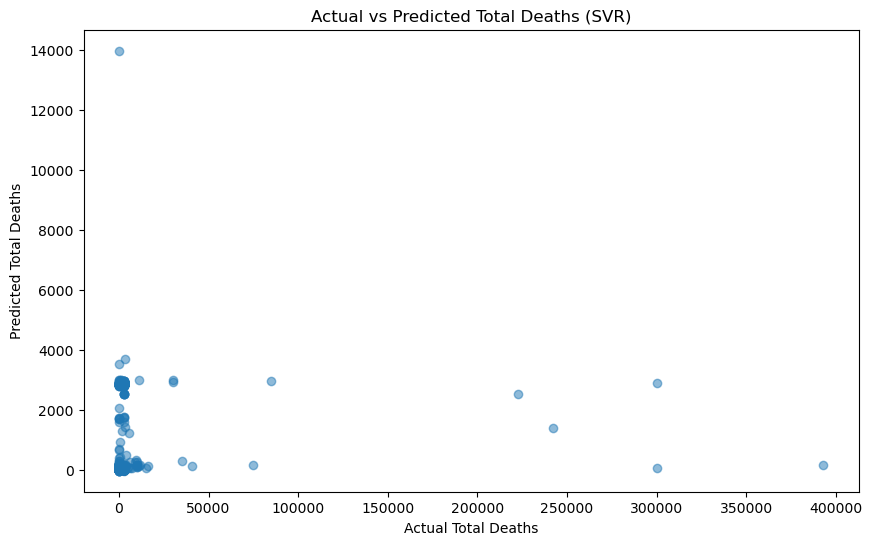

In [18]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Total Deaths')
plt.ylabel('Predicted Total Deaths')
plt.title('Actual vs Predicted Total Deaths (SVR)')
plt.show()

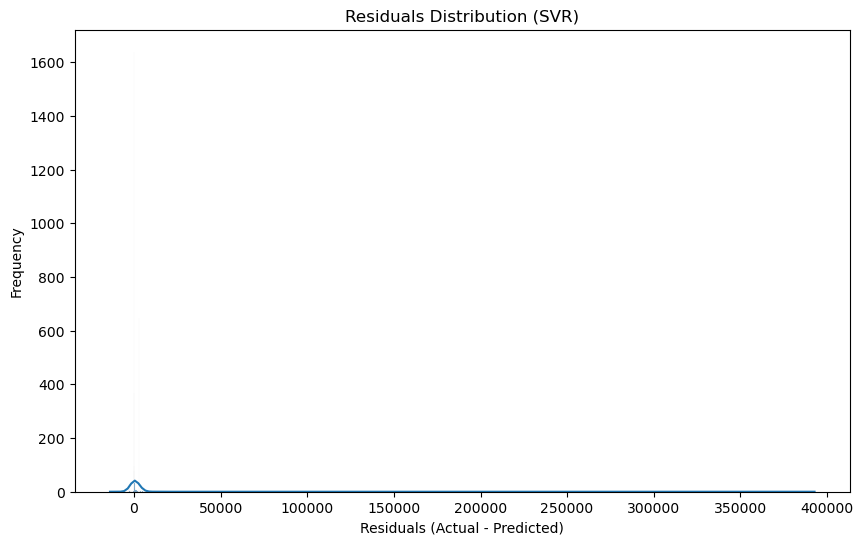

In [19]:
# Residual plot (difference between actual and predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (SVR)')
plt.show()

In [21]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

In [23]:
# Create a Dash web application
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Geophysical Events Prediction Dashboard"),

    # Dropdowns for feature and algorithm selection
    dcc.Dropdown(
        id='feature-dropdown',
        options=[
            {'label': col, 'value': col} for col in X.columns
        ],
        value='Dis Mag Value',
        style={'width': '50%'},
    ),

    dcc.Dropdown(
        id='algorithm-dropdown',
        options=[
            {'label': 'Random Forest Regressor', 'value': 'random-forest'},
            {'label': 'Support Vector Regressor', 'value': 'svr'},
            # Add more algorithms as needed
        ],
        value='svr',
        style={'width': '50%'},
    ),

    # Scatter plot of actual vs predicted values
    dcc.Graph(
        id='scatter-plot',
        figure=px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Total Deaths', 'y': 'Predicted Total Deaths'},
                          title='Actual vs Predicted Total Deaths'),
    ),

    # Residual plot (difference between actual and predicted values)
    dcc.Graph(
        id='residual-plot',
        figure=px.histogram(x=y_test - y_pred, labels={'x': 'Residuals (Actual - Predicted)', 'y': 'Frequency'},
                            title='Residuals Distribution'),
    ),
])

# Define callback to update scatter plot and histogram based on dropdown selections
@app.callback(
    [Output('scatter-plot', 'figure'),
     Output('residual-plot', 'figure')],
    [Input('feature-dropdown', 'value'),
     Input('algorithm-dropdown', 'value')]
)
def update_plots(selected_feature, selected_algorithm):
    # Select features based on dropdown
    X_selected = X[[selected_feature]]

    # Train the selected model
    if selected_algorithm == 'random-forest':
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    elif selected_algorithm == 'svr':
        model = SVR(kernel='linear')
    else:
        raise ValueError('Invalid algorithm selected')

    model.fit(X_selected, y)

    # Make predictions on the entire dataset
    y_pred_all = model.predict(X_selected)

    # Create scatter plot
    scatter_plot = px.scatter(x=y, y=y_pred_all, labels={'x': 'Actual Total Deaths', 'y': 'Predicted Total Deaths'},
                              title=f'Actual vs Predicted Total Deaths (Algorithm: {selected_algorithm})')

    # Create residual histogram
    residual_hist = px.histogram(x=y - y_pred_all, labels={'x': 'Residuals (Actual - Predicted)', 'y': 'Frequency'},
                                 title=f'Residuals Distribution (Algorithm: {selected_algorithm})')

    return scatter_plot, residual_hist

# Run the web application
if __name__ == '__main__':
    app.run_server(debug=True)